# ASSIGNMENT 2 B - PROCESS CONSUMER
### Sandeep Sethumadhavan
#### 30980283

The following block executes the code for consuming streaming data for the process attack data and then plotting it


<IPython.core.display.Javascript object>


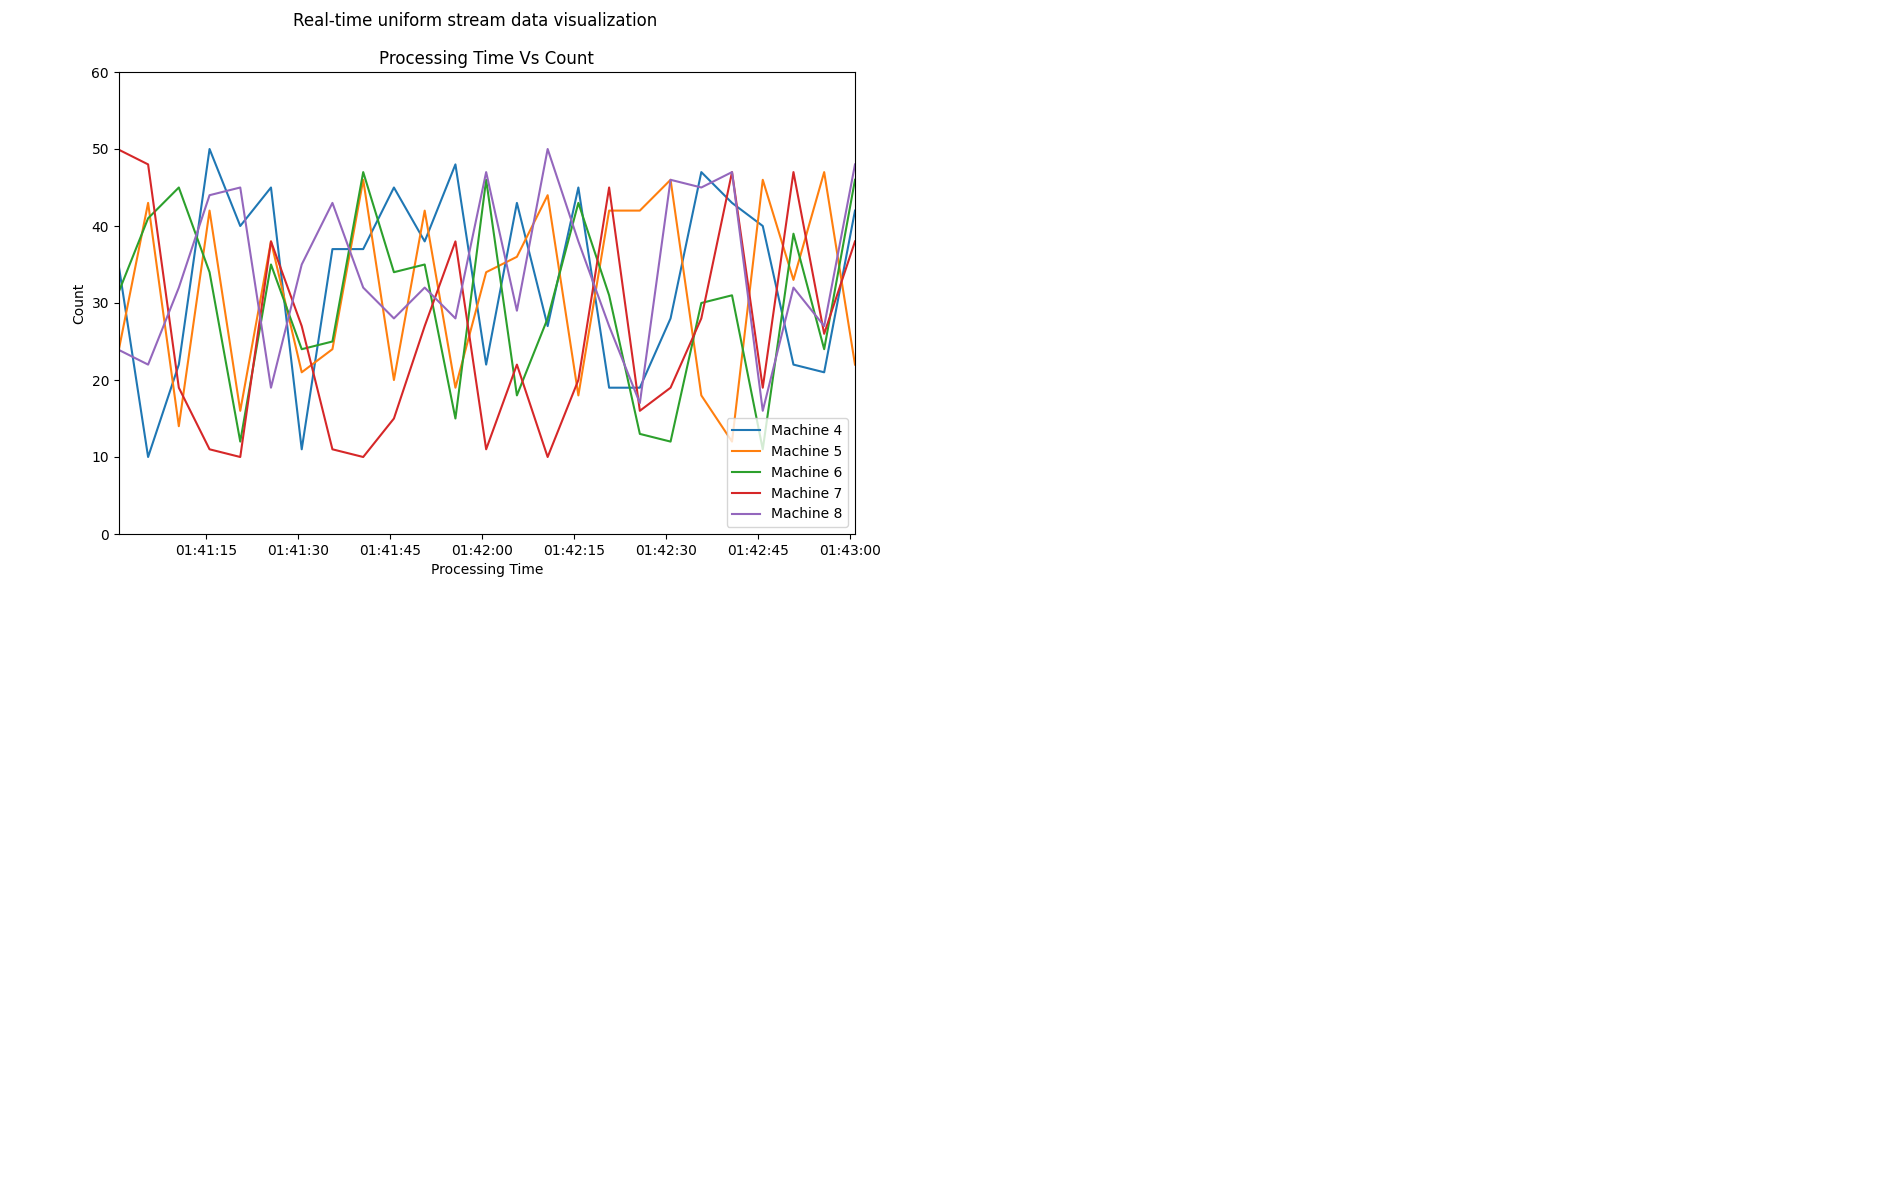

KeyboardInterrupt: 

In [11]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
from json import loads
import statistics
import matplotlib
import matplotlib.pyplot as plt
import time
import datetime as dt
from datetime import datetime
import calendar
from datetime import timedelta

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

#initializing the topic
topic = 'Process_Producer'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   #consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   #auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax1 = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Count')
        ax1.set_xlim(0,120)
        ax1.set_ylim(0,60) 
        ax1.set_yticks([0,10,20,30,40,50,60])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1
    except Exception as ex:
        print(str(ex))

def consume_messages(consumer, fig, ax1):
    try:
        # container for x and y values
        x, y4,y5,y6,y7,y8 = [], [], [], [], [], []
        # print('Waiting for messages')
        i=0
        
        
        for message in consumer:
            
            #get current time
            current_time=dt.datetime.utcnow()
            
            #2 minute flag        
            delta = timedelta(seconds=120)
            
            #time 2 minutes back
            origin_time=current_time-delta
            
            mess = message.value
            
            #appending current time 
            x.append(current_time)
            
            #initializing count
            count4,count5,count6,count7,count8=0,0,0,0,0
            
            #updating count for each machine id
            for all in mess:
                
                if all['machine']=='4':
                    count4+=1
                if all['machine']=='5':
                    count5+=1
                if all['machine']=='6':
                    count6+=1
                if all['machine']=='7':
                    count7+=1
                if all['machine']=='8':
                    count8+=1
                    
            #appending counts to the lists                      
            y4.append(count4)
            y5.append(count5)
            y6.append(count6)
            y7.append(count7)
            y8.append(count8)
            
            #plotting the graph
            if len(x) > 2:
                
                ax1.clear()
                #set labels for legend for each line
                ax1.plot(x, y4,label='Machine 4')
                ax1.plot(x, y5,label='Machine 5')
                ax1.plot(x, y6,label='Machine 6')
                ax1.plot(x, y7,label='Machine 7')
                ax1.plot(x, y8,label='Machine 8')
                ax1.set_xlabel('Processing Time')
                ax1.set_ylabel('Count')
                ax1.set_title('Processing Time Vs Count')
                #set x axis limits as 2 minutes 
                ax1.set_xlim([origin_time,current_time])
                ax1.set_ylim(0,60) 
                ax1.set_yticks([0,10,20,30,40,50,60])
                plt.legend()
                fig.canvas.draw()
#                 x.pop(0) # removing the item in the first position
#                 y4.pop(0)
#                 y5.pop(0)
#                 y6.pop(0)
#                 y7.pop(0)
#                 y8.pop(0)
                
        plt.close('all')
           
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax1 = init_plots()
    consume_messages(consumer, fig, ax1)    
    
    